#  ROCK, PAPER, SCISSORS

In [1]:
import random

def user_input():
    '''
    This is a function that takes a user input for Rock, Paper, Scissors represented as r,p,s respectively.
    The function returns the input selected by the user.
    '''
    while True:
        user_input= input('Enter r for Rock, p for Paper or s for Scissors:').lower()
        if user_input in ['r', 'p', 's']:
            return user_input
        else:
            print("wrong input, please enter 'r', 'p' or 's'.")

def computer_input():
    '''
    This is a function that generates and returns a random choice of r,p,s for the computer.
    '''
    comp_input= ['r', 'p', 's']
    return random.choice(comp_input)

def game_winner(user_input, computer_input):
    '''
    This is a function that takes in the choice of the user as well as the choice randomly generated for the computer.
    The function determines whether the game play ends in a win, tie or lose.
    The function returns the result obtained at the end of every game
    '''
    if user_input== computer_input:
        return 'its a tie'
    elif (user_input== 'r' and computer_input== 's') or \
         (user_input== 'p' and computer_input== 'r') or \
         (user_input== 's' and computer_input== 'p'):
        return 'Congrats. You win!'
    else:
        return 'Ouch! You lose'

def play_game():
    '''
    This is a function that initiates the game of rock paper scissors.
    The function prompts the user to make a choice and randomly selects an option for the computer.
    The function prints the result of the game based on the criteria from the previous function
    '''
    user= user_input()
    computer= computer_input()
    print('my choice:', user)
    print('computer choice:', computer)
    print(game_winner(user, computer))

In [2]:
play_game()

Enter r for Rock, p for Paper or s for Scissors: p


my choice: p
computer choice: r
Congrats. You win!


# TIC TAC TOE

In [3]:
def create_board():
    '''
    This is a function that returns a 2D 3 by 3 matrix to serve as the board for a tic tac toe game.
    The function creates a list of lists with 3 rows and 3 columns.
    '''
    return [[' ' for _ in range(3)] for _ in range(3)]

def print_board(board):
    '''
    This function takes in the board created and concatenates the rows together using a string object.
    It separates the column using another string object
    The function prints out the board to be used for a tic tac toe game.
    '''
    for row in board:
        print('|'.join(row))
        print('-' * 5)

def check_winner(board, player):
    '''
    This function takes in the board created and the players of the game.
    It checks various criterias for winning a tic tac toe game.
    It returns True if the the criterias are met
    '''
    for row in board:
        if all(cell == player for cell in row):
            return True

    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True

    if all(board[i][i] == player for i in range(3)) or all(board[i][2-i]== player for i in range(3)):

        return True

    return False

def check_tie(board):
    '''
    This function takes in the board and checks if all the spaces on the board are filled.
    The function checks if the game ended in a tie.
    If there are no spaces left and the criteria for winning has not been met  it returns true.
    Otherwise it returns false
    '''
    for row in board:
        for cell in row:
            if cell== ' ':
                return False
    return True

def empty_cells(board):
    '''
    This function takes in the board.
    It checks for all the empty cells on the board.
    It returns a list of the empty cells to enable the computer make a random choice
    '''
    empty_cells= []
    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                empty_cells.append((i,j))

    return empty_cells
     
def agent_move(board):
    '''
    This function takes in the board.
    It checks for empty cells and makes a random choice for the computer using the coordinates of the empty cell.
    It returns the coordinate of the empty cell
    '''
    empty= empty_cells(board)
    row, col= random.choice(empty)
    return row, col


def game_play():
    '''
    This function initiates the game play for tic tac toe.
    It creates and displays the board with options for the player to choose coordinates
    It randomly selects the coordinate for the computer and checks the criteria for win, tie and lose.
    It returns the result of the game.
    '''
    board= create_board()
    player= 'X'

    while True:
        print_board(board)

        if player== 'X':
            row, col= map(int, input('Play your choice(row, col):').split(','))
        else:
            row, col= agent_move(board)
            print('Agent move:', (row,col))

        if board[row][col] != ' ':
                    print("Wrong choice. Try again.")
                    continue

        board[row][col] = player

        if check_winner(board, player):
            print_board(board)
            print(f"{player} wins!")
            break

        if check_tie(board):
            print_board(board)
            print("It's a tie!")
            break

        player = 'O' if player == 'X' else 'X'

In [4]:
game_play()

 | | 
-----
 | | 
-----
 | | 
-----


Play your choice(row, col): 1,2


 | | 
-----
 | |X
-----
 | | 
-----
Agent move: (0, 2)
 | |O
-----
 | |X
-----
 | | 
-----


Play your choice(row, col): 1,1


 | |O
-----
 |X|X
-----
 | | 
-----
Agent move: (0, 0)
O| |O
-----
 |X|X
-----
 | | 
-----


Play your choice(row, col): 1,0


O| |O
-----
X|X|X
-----
 | | 
-----
X wins!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
company_sales = pd.read_csv('company_sales_data.csv')
data= company_sales.copy()

data.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


# Total profit of all months 

In [3]:
monthly_profit= data.groupby('month_number')['total_profit'].sum()

pd.DataFrame(monthly_profit).reset_index()

,month_number,total_profit
0,1,211000
1,2,183300
2,3,224700
3,4,222700
4,5,209600
5,6,201400
6,7,295500
7,8,361400
8,9,234000
9,10,266700


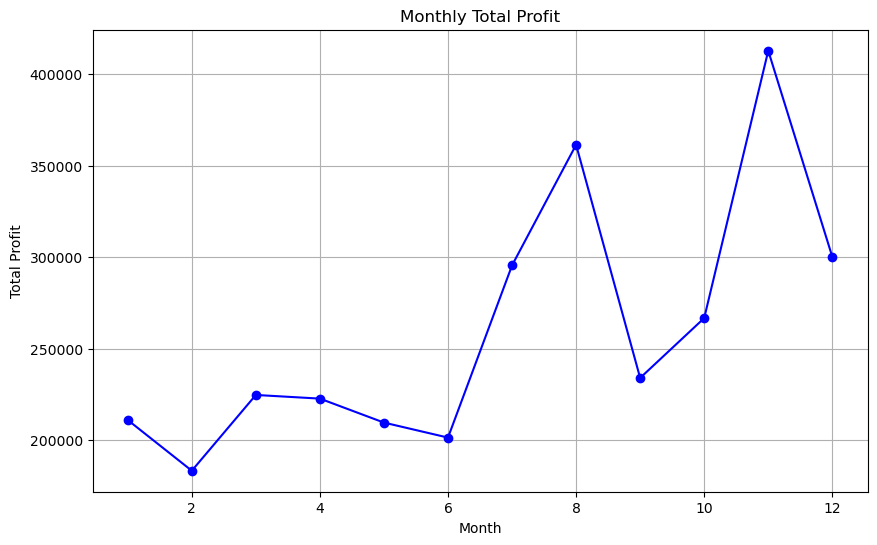

In [4]:
plt.figure(figsize=(10, 6)) 
plt.plot(data.month_number, data.total_profit, marker='o', linestyle='-', color='blue')

plt.title('Monthly Total Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')

#plt.xticks(month_number)

plt.grid(True)
plt.show()

# Bathing soap and facewash of all months

In [5]:
monthly_prod_sales= data.groupby('month_number')[['facewash', 'bathingsoap']].sum()

pd.DataFrame(monthly_prod_sales).reset_index()

,month_number,facewash,bathingsoap
0,1,1500,9200
1,2,1200,6100
2,3,1340,9550
3,4,1130,8870
4,5,1740,7760
5,6,1555,7490
6,7,1120,8980
7,8,1400,9960
8,9,1780,8100
9,10,1890,10300


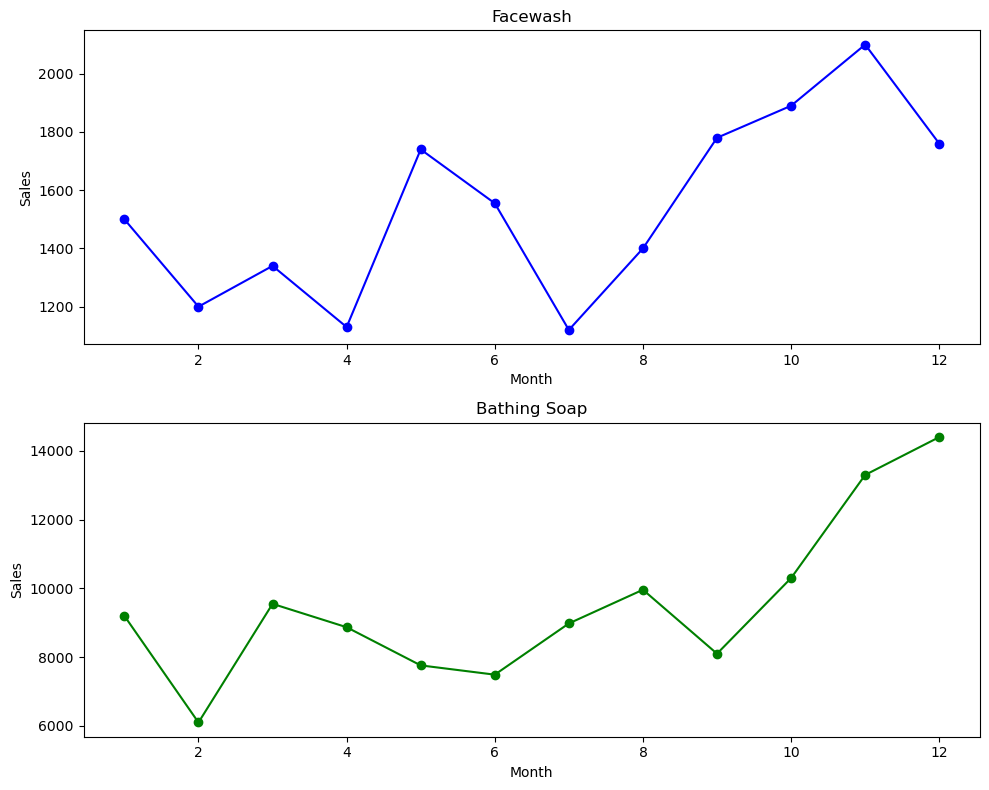

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))


axs[0].plot(data.month_number, data.facewash, marker='o', linestyle='-', color='blue')
axs[0].set_title('Facewash')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales')

axs[1].plot(data.month_number, data.bathingsoap, marker='o', linestyle='-', color='green')
axs[1].set_title('Bathing Soap')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales')

plt.tight_layout()

plt.show()